In [1]:
from methods.LEGv0 import *

In [2]:
from keras.preprocessing import image
import numpy as np

We are excuting LEG program __main__
Image has been read successfully
VGG19 has been imported successfully
('n06874185', 'traffic_light', 0.9999889)
('n04458633', 'totem_pole', 6.676457e-06)
('n03976657', 'pole', 1.978098e-06)
('n06794110', 'street_sign', 1.7257655e-06)
('n03032252', 'cinema', 3.54937e-07)
The Classfication Category is  920
matrix_d creation completed
Sigma creation complted
920 0.9999889
matrix_d creation completed
Sigma creation complted
920 0.9999889


C:\Users\RmmLeo10\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:564: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
C:\Users\RmmLeo10\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:564: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)
C:\Users\RmmLe

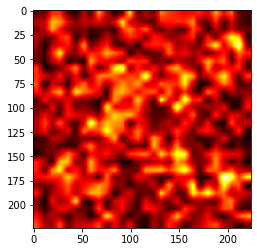

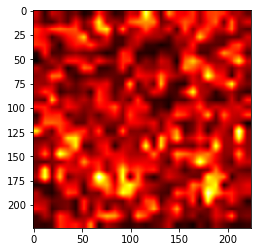

The time spent on LEG explanation is  0.77 mins


In [3]:
if __name__ == "__main__":
    print("We are excuting LEG program", __name__)
    # read the image
    img = image.load_img('Image/trafficlight.jpg', target_size=(224,224))
    img = image.img_to_array(img).astype(int)
    image_input = np.expand_dims(img.copy(), axis = 0)
    image_input = preprocess_input(image_input)
    print("Image has been read successfully")

    # read the model
    VGG19_MODEL = VGG19(include_top = True)
    print("VGG19 has been imported successfully")
    # make the prediction of the image by the vgg19
    preds = VGG19_MODEL.predict(image_input)
    for pred_class in decode_predictions(preds)[0]:
        print(pred_class)
    chosen_class = np.argmax(preds)
    print("The Classfication Category is ", chosen_class)
    begin_time = time()

    LEG = LEG_explainer(np.expand_dims(img.copy(), axis = 0), VGG19_MODEL, predict_vgg19, num_sample = 100, penalty=None)
    LEGTV = LEG_explainer(np.expand_dims(img.copy(), axis = 0), VGG19_MODEL, predict_vgg19, num_sample = 100, penalty='TV', lambda_arr = [0.1, 0.3])
    end_time = time()
    plt.imshow(LEG[0][0], cmap='hot', interpolation="nearest")
    plt.show() #change the backend of matplotlib if it can not be displayed 
    plt.imshow(LEGTV[0][0], cmap='hot', interpolation="nearest")
    plt.show()
    
    print("The time spent on LEG explanation is ",round((end_time - begin_time)/60,2), "mins") 